<a href="https://colab.research.google.com/github/SurajJadhav-5/Heart_Disease_Prediction_Viz/blob/main/Heart.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split


In [ ]:
# url = 'https://raw.githubusercontent.com/SurajJadhav-5/Heart_Disease_Prediction_Viz/main/heart.csv?token=AQDS33QXWL3QFIPUVTZHS4LBVLW2A'
# data = pd.read_csv(url)

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving heart.csv to heart.csv


In [ ]:

data = pd.read_csv("heart.csv")
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [ ]:
# https://www.kaggle.com/chingchunyeh/heart-disease-report
# age
# sex (1 = male; 0 = female)
# cp - chest pain type (4 values)
# trestbps - resting blood pressure
# chol - serum cholestoral in mg/dl
# fbs - fasting blood sugar > 120 mg/dl
# restcg - Resting electrocardiographic measurement (0 = normal, 1 = having ST-T wave abnormality, 
#          2 = showing probable or definite left ventricular hypertrophy by Estes' criteria)
# thalach = maximum heart rate achieved
# exang - exercise induced angina
#         Angina is a type of chest pain caused by reduced blood flow to the heart

# oldpeak = ST depression induced by exercise relative to rest
# slope = the slope of the peak exercise ST segment (Value 1: upsloping, Value 2: flat, Value 3: downsloping)
# ca = number of major vessels (0-3) colored by flourosopy
# thal: 3 = normal; 6 = fixed defect; 7 = reversable defect

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [ ]:
data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


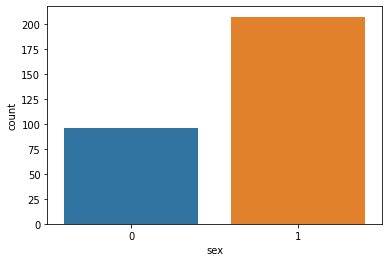

In [ ]:
import seaborn as sns

sns.countplot(x = data['sex'], data= data)

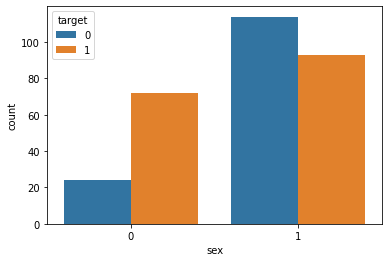

In [ ]:
sns.countplot(x = data['sex'], data= data, hue = data['target'])

We can see women tend to have more prob of heart disease more than men.

In [ ]:

data['cato_age'] = np.where((data['age'] < 47), 'A', data['age'])
data['cato_age'] = np.where((data['age']>= 47) & (data['age'] < 55), 'B', data['cato_age'])
data['cato_age'] = np.where((data['age']>= 55) & (data['age'] <61) , 'C', data['cato_age'])
data['cato_age'] = np.where(data['age']>=61 , 'D', data['cato_age'])


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


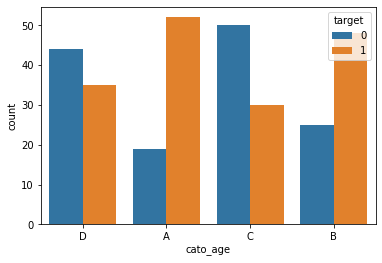

In [ ]:
sns.countplot(data['cato_age'], data= data, hue = data['target'])

Age groups are made according to age distributi:on by 25%


1. < 47 = A
2. => 47 & < 55 = B
3. => 55 % < 61 = C
4.   =>61 = D










In [ ]:
data['chol'].unique()

array([233, 250, 204, 236, 354, 192, 294, 263, 199, 168, 239, 275, 266,
       211, 283, 219, 340, 226, 247, 234, 243, 302, 212, 175, 417, 197,
       198, 177, 273, 213, 304, 232, 269, 360, 308, 245, 208, 264, 321,
       325, 235, 257, 216, 256, 231, 141, 252, 201, 222, 260, 182, 303,
       265, 309, 186, 203, 183, 220, 209, 258, 227, 261, 221, 205, 240,
       318, 298, 564, 277, 214, 248, 255, 207, 223, 288, 160, 394, 315,
       246, 244, 270, 195, 196, 254, 126, 313, 262, 215, 193, 271, 268,
       267, 210, 295, 306, 178, 242, 180, 228, 149, 278, 253, 342, 157,
       286, 229, 284, 224, 206, 167, 230, 335, 276, 353, 225, 330, 290,
       172, 305, 188, 282, 185, 326, 274, 164, 307, 249, 341, 407, 217,
       174, 281, 289, 322, 299, 300, 293, 184, 409, 259, 200, 327, 237,
       218, 319, 166, 311, 169, 187, 176, 241, 131])

In [ ]:
data['cp'].nunique()

4

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


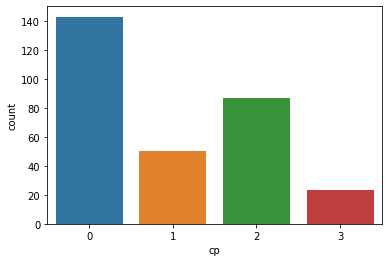

In [ ]:
sns.countplot( data['cp'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


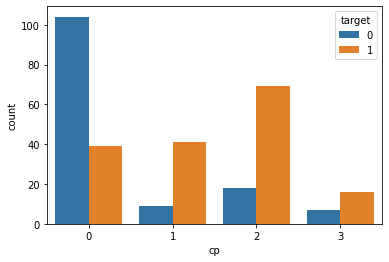

In [ ]:
sns.countplot( data['cp'], hue = data['target'])

Chest pain with 1, 2, 3 have more prob of heart disease, unlike chest pain with 0 have less prob

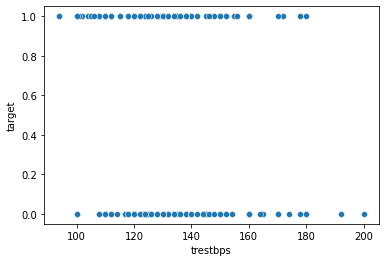

In [ ]:
sns.scatterplot(data = data, x = data['trestbps'], y =data['target'])

Any blood pressure may have heart disease

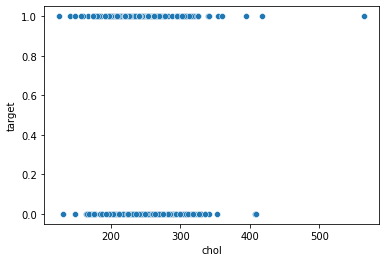

In [ ]:
sns.scatterplot(data = data, x = data['chol'], y =data['target'])

Any cholestrol level may have heart disease

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


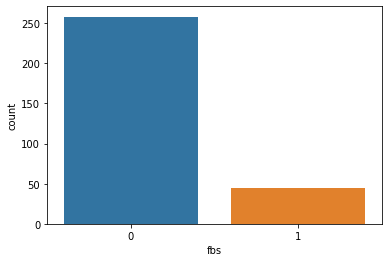

In [ ]:
sns.countplot(data['fbs'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


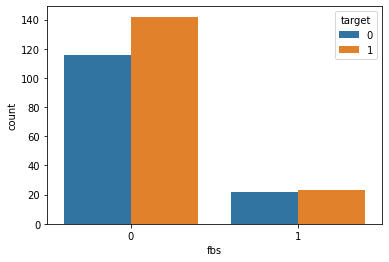

In [ ]:
sns.countplot(data['fbs'] , hue = data['target'])

Very less peopple have fasting blood suger more than 120 but nearly half of the people with blood suger less than and more than 120 tend to have the disease.


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


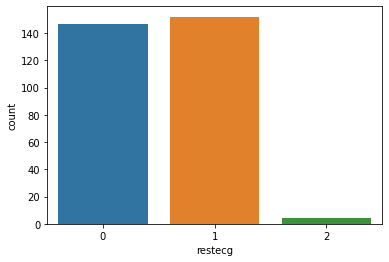

In [ ]:
sns.countplot(data['restecg'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


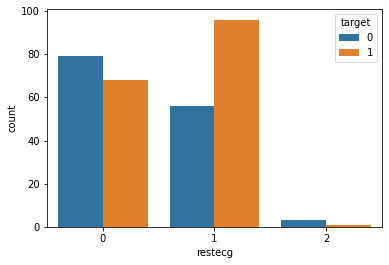

In [ ]:
sns.countplot(data['restecg'], hue = data.target)

Electrocardoigraphic measurment shows that half of the people are normal and nearly another half have ST-T wave abmormility. Very less people have another problem. People with normal conditions have same prob of having the disease but with ST-T wave abmormility they have more prob of having the disease.

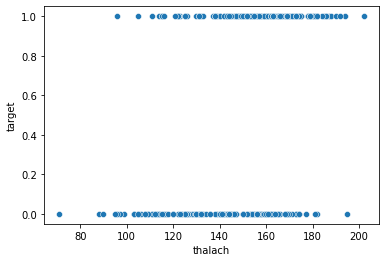

In [ ]:
sns.scatterplot(data = data, x = data['thalach'], y = data.target)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


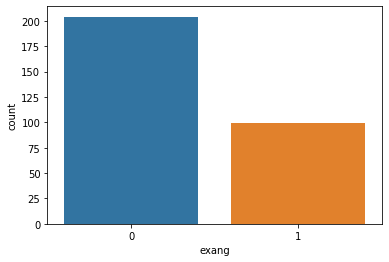

In [ ]:
sns.countplot(data.exang)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


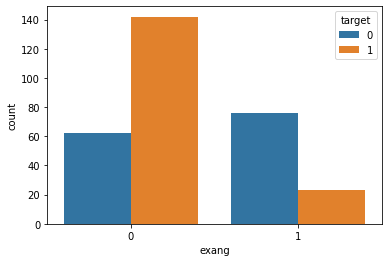

In [ ]:
sns.countplot(data.exang, hue  =  data.target)

Those people dont have exercise induced anigma, shoes more prob of having the disease

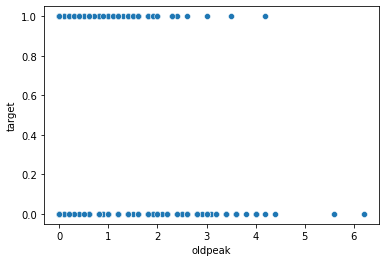

In [ ]:
sns.scatterplot(data = data, x= data.oldpeak, y = data.target)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


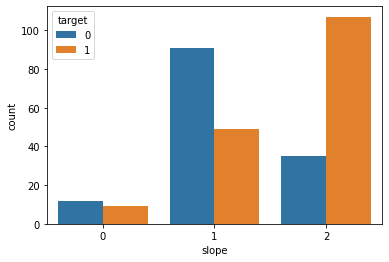

In [ ]:
sns.countplot(data.slope, hue = data.target)


People with flat slope have less prob of disease but people with down slope tend to have the heart disease.



/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


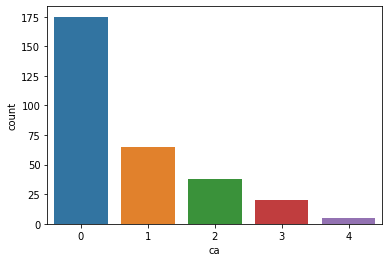

In [ ]:
sns.countplot(data.ca)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


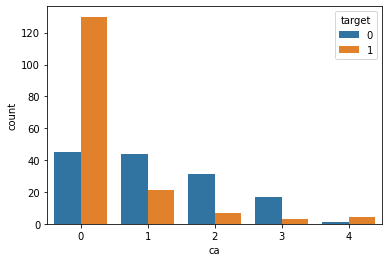

In [ ]:
sns.countplot(data.ca, hue= data.target)

didnt understant what is intenstion of giving ca column

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


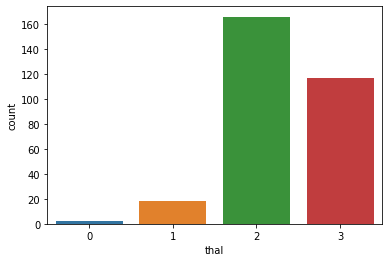

In [ ]:
sns.countplot(data.thal)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


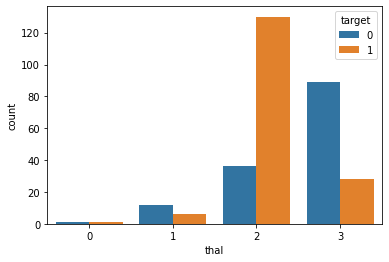

In [ ]:
sns.countplot(data.thal, hue = data.target)

People with thalassemia type 2 tend to have more heart disease than other types and type 3 shows less prob of heart disease
* in metadata there is numbering of 3, 6, 7 , have to check numbering order


In [ ]:
data = data.drop('cato_age',1)

In [ ]:
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


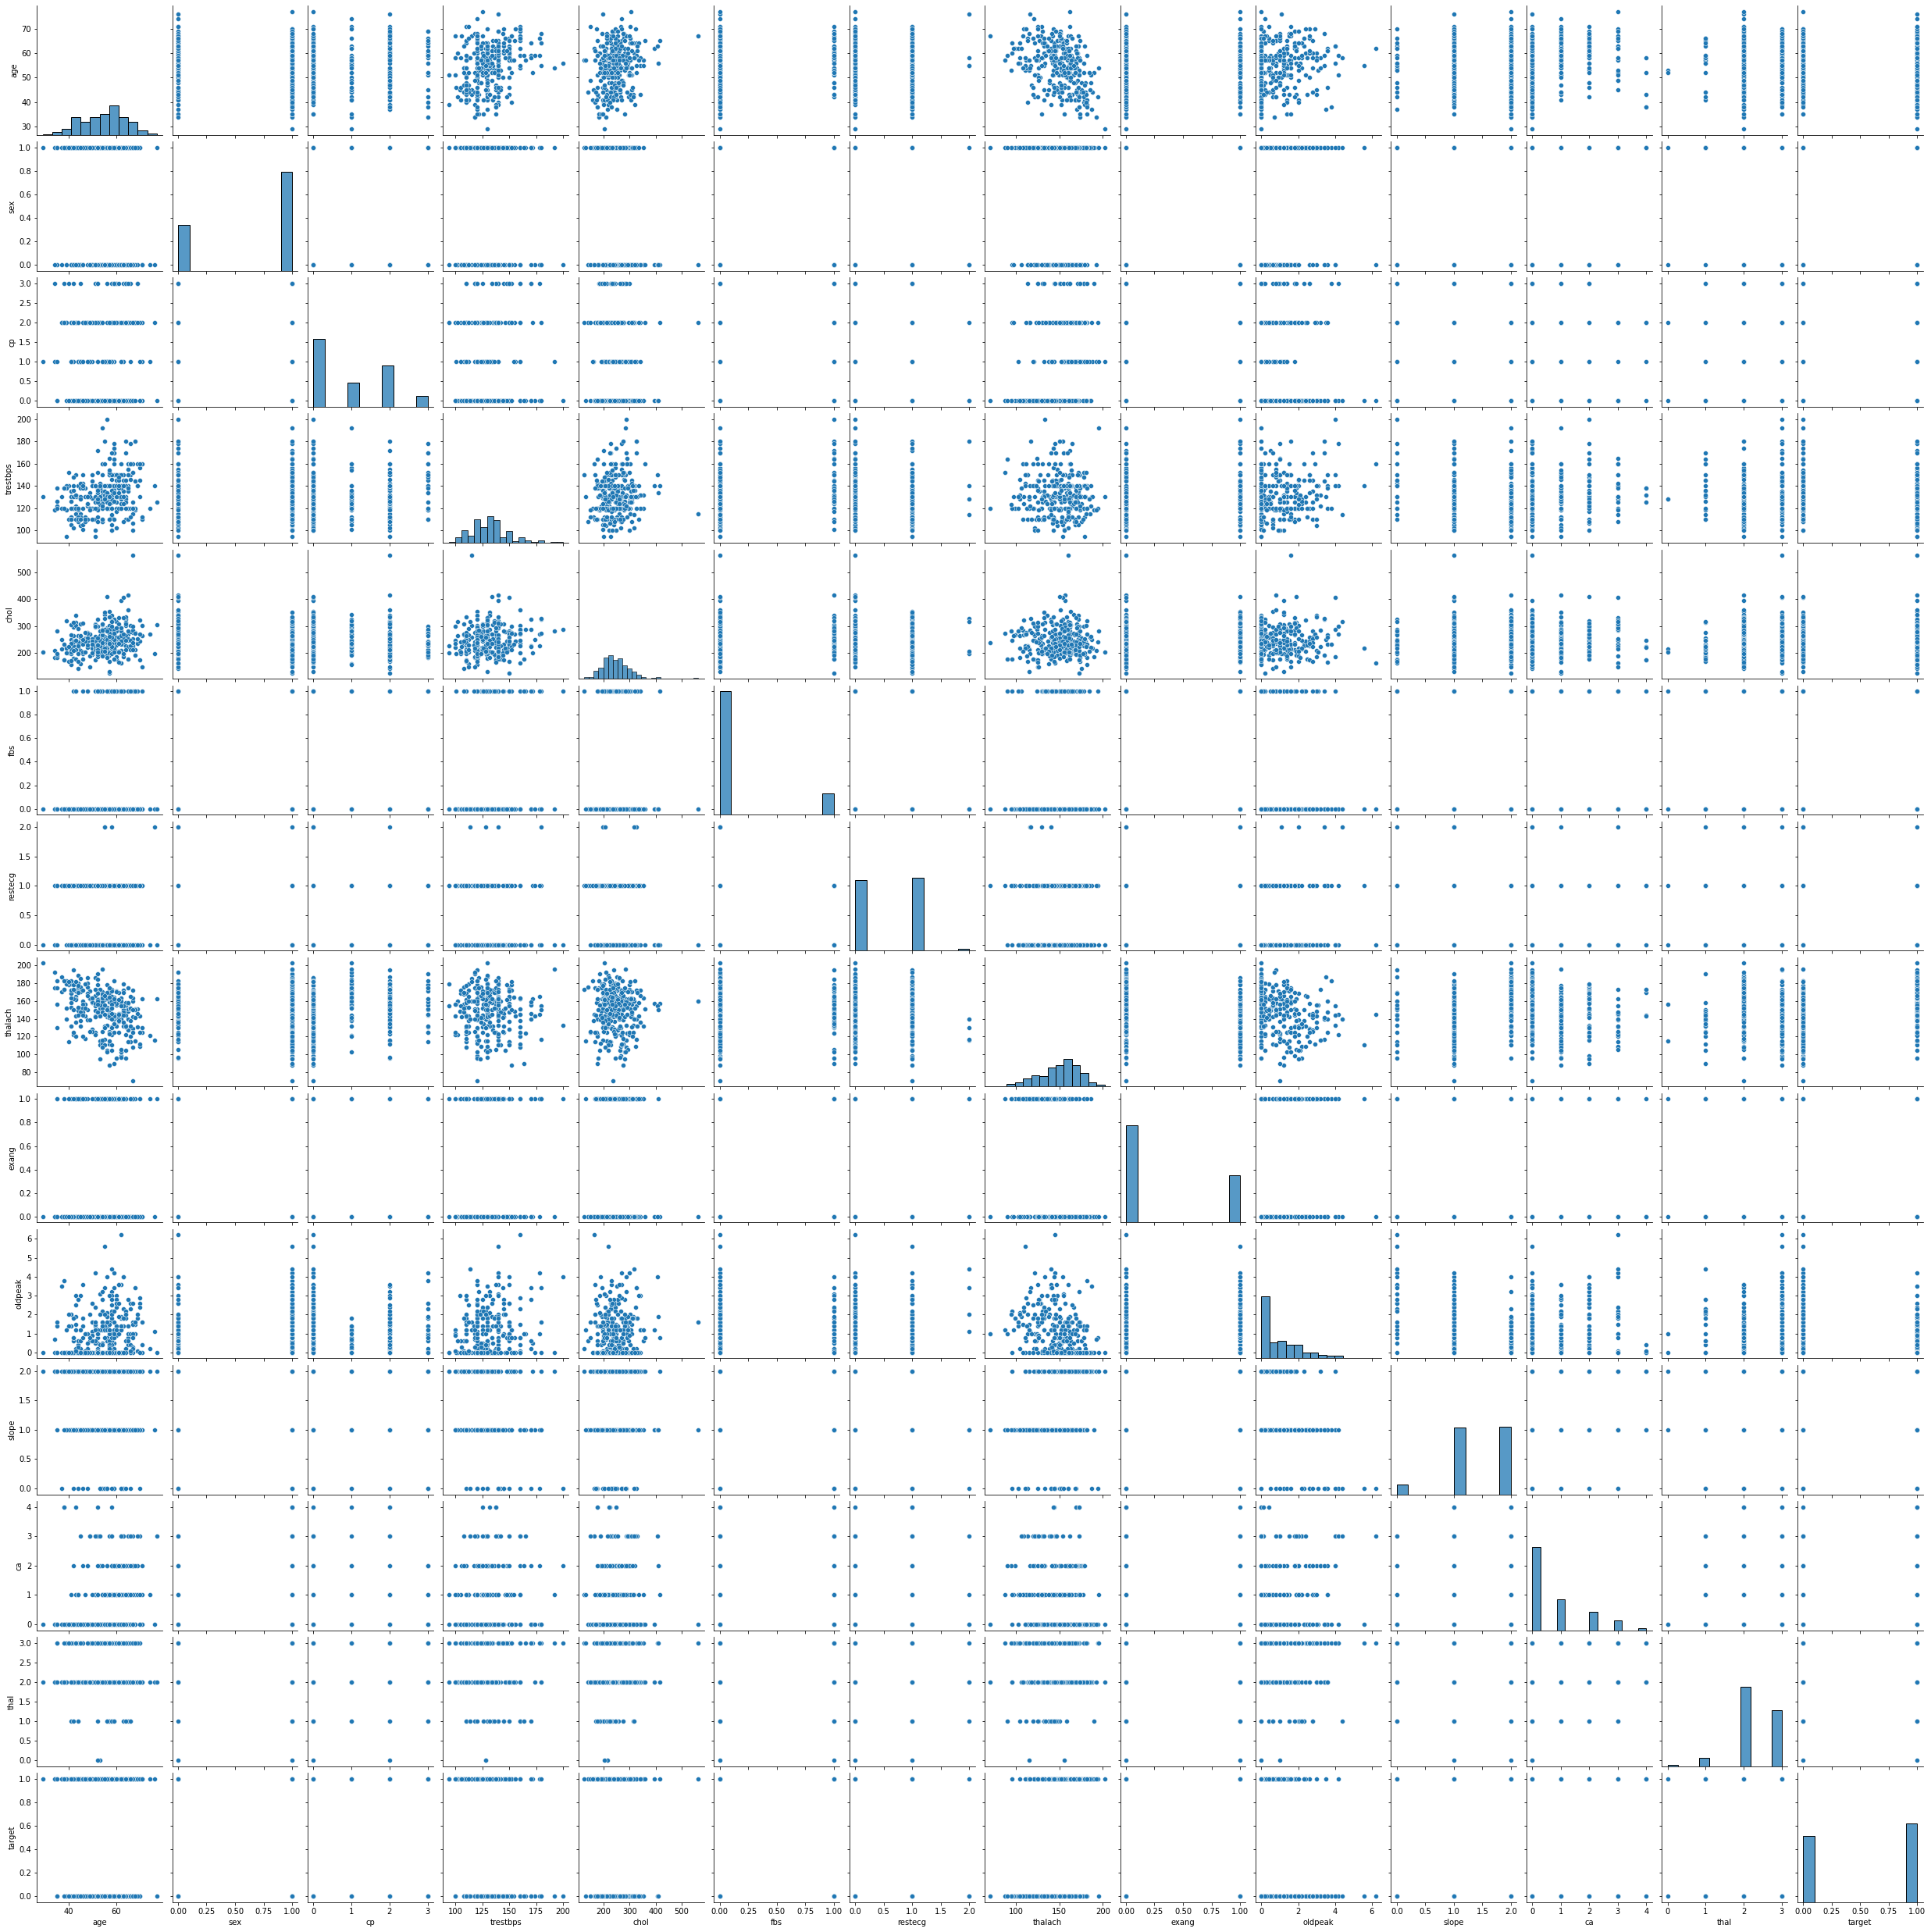

In [ ]:
sns.pairplot(data)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


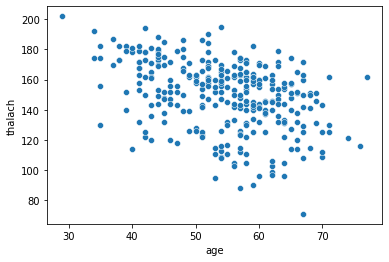

In [ ]:
sns.scatterplot(data.age, data.thalach)

As persons age incerases the maximum heart rate decreases.

In [ ]:
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [ ]:
columns = ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal']

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


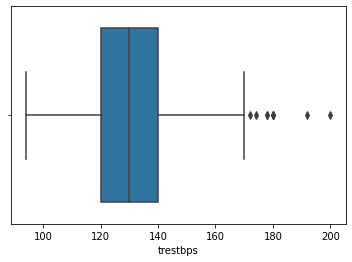

In [ ]:
sns.boxplot(data['trestbps'])

In [ ]:
data['trestbps'][data['trestbps'] > 175].count()

7

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


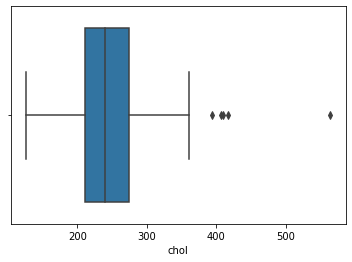

In [ ]:
sns.boxplot(data['chol'])

In [ ]:
data['chol'][data['chol']> 360].count()

5

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


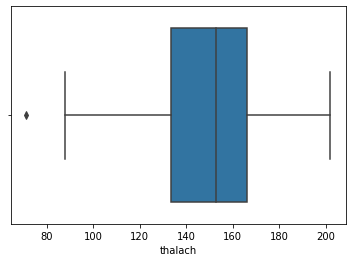

In [ ]:
sns.boxplot(data['thalach'])


In [ ]:
data['thalach'][data['thalach'] < 85].count()

1

In [ ]:
data[(data['trestbps'] > 175) | (data['chol'] > 360) | (data['thalach'] < 85)].count()

age         13
sex         13
cp          13
trestbps    13
chol        13
fbs         13
restecg     13
thalach     13
exang       13
oldpeak     13
slope       13
ca          13
thal        13
target      13
dtype: int64

In [ ]:
data = data.drop(data[(data['trestbps'] > 175) | (data['chol'] > 360) | (data['thalach'] < 85)].index)

Dropped all rows which included  outliers

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 290 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       290 non-null    int64  
 1   sex       290 non-null    int64  
 2   cp        290 non-null    int64  
 3   trestbps  290 non-null    int64  
 4   chol      290 non-null    int64  
 5   fbs       290 non-null    int64  
 6   restecg   290 non-null    int64  
 7   thalach   290 non-null    int64  
 8   exang     290 non-null    int64  
 9   oldpeak   290 non-null    float64
 10  slope     290 non-null    int64  
 11  ca        290 non-null    int64  
 12  thal      290 non-null    int64  
 13  target    290 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 34.0 KB


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


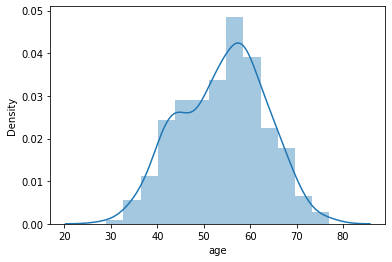

In [ ]:
sns.distplot(data.age)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


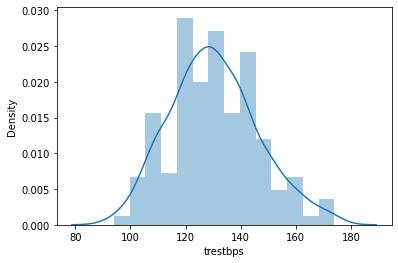

In [ ]:
sns.distplot(data.trestbps)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


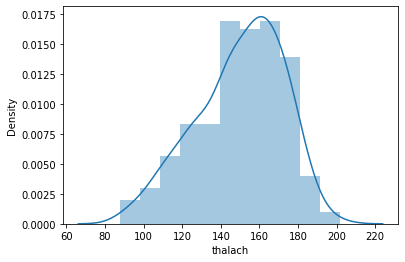

In [ ]:
sns.distplot(data.thalach)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


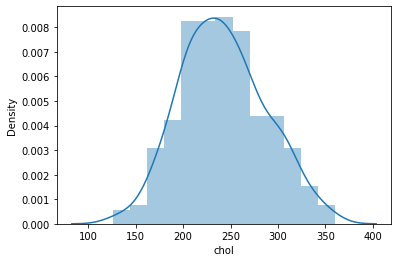

In [ ]:
sns.distplot(data.chol)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


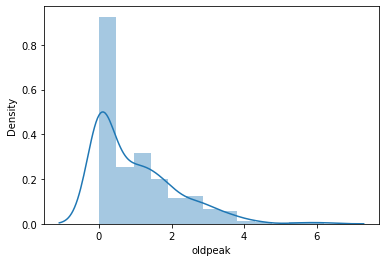

In [ ]:
sns.distplot(data.oldpeak)

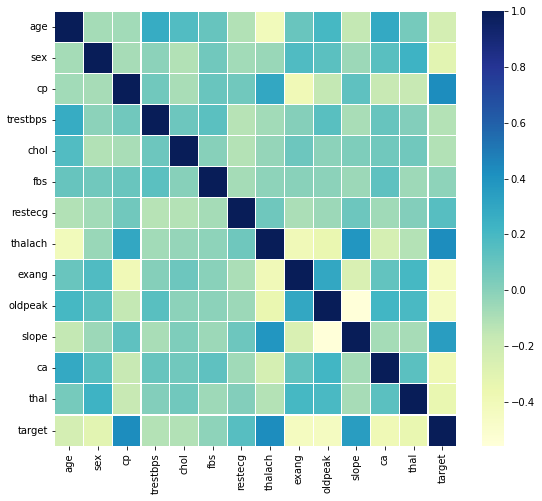

In [ ]:
corrmat = data.corr()
  
f, ax = plt.subplots(figsize =(9, 8))
sns.heatmap(corrmat, ax = ax, cmap ="YlGnBu", linewidths = 0.1)

In [ ]:
corrmat

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.074393,-0.069735,0.274152,0.172226,0.103023,-0.111191,-0.411258,0.094841,0.206728,-0.161388,0.289798,0.055012,-0.230083
sex,-0.074393,1.000000,-0.081202,-0.009799,-0.111895,0.071271,-0.065227,-0.043418,0.175729,0.139167,-0.049243,0.147492,0.234537,-0.302614
cp,-0.069735,-0.081202,1.000000,0.073958,-0.088919,0.096119,0.069364,0.297549,-0.393278,-0.158170,0.125579,-0.170617,-0.174513,0.430488
trestbps,0.274152,-0.009799,0.073958,1.000000,0.083031,0.136158,-0.125224,-0.070776,0.012453,0.145719,-0.087196,0.099440,0.014477,-0.119106
chol,0.172226,-0.111895,-0.088919,0.083031,1.000000,0.005485,-0.118826,-0.029959,0.084134,-0.008774,0.030891,0.071607,0.070263,-0.112803
fbs,0.103023,0.071271,0.096119,0.136158,0.005485,1.000000,-0.074615,-0.014358,-0.003144,-0.008258,-0.048018,0.129105,-0.053298,-0.012352
restecg,-0.111191,-0.065227,0.069364,-0.125224,-0.118826,-0.074615,1.000000,0.077752,-0.095448,-0.049752,0.085439,-0.060159,0.016259,0.153368
thalach,-0.411258,-0.043418,0.297549,-0.070776,-0.029959,-0.014358,0.077752,1.000000,-0.396612,-0.349781,0.387851,-0.238915,-0.118056,0.432226
exang,0.094841,0.175729,-0.393278,0.012453,0.084134,-0.003144,-0.095448,-0.396612,1.000000,0.296976,-0.259663,0.113352,0.206161,-0.435424
oldpeak,0.206728,0.139167,-0.158170,0.145719,-0.008774,-0.008258,-0.049752,-0.349781,0.296976,1.000000,-0.558018,0.217761,0.191851,-0.440543


No two variables are highly related so we can say that all variables are independent of each other.

In [ ]:
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [ ]:
data.columns


Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [ ]:
columns = ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal']
target = data['target']

In [ ]:
X = data[columns]
y = target

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state=42)

In [ ]:
X_train.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
69,62,0,0,124,209,0,1,163,0,0.0,2,0,2
214,56,1,0,125,249,1,0,144,1,1.2,1,1,2
38,65,0,2,155,269,0,1,148,0,0.8,2,0,2
16,58,0,2,120,340,0,1,172,0,0.0,2,0,2
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3


In [ ]:
X_test.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
86,68,1,2,118,277,0,1,151,0,1.0,2,1,3
270,46,1,0,120,249,0,0,144,0,0.8,2,0,3
46,44,1,2,140,235,0,0,180,0,0.0,2,0,2
180,55,1,0,132,353,0,1,132,1,1.2,1,1,3
148,44,1,2,120,226,0,1,169,0,0.0,2,0,2


In [ ]:
y_train.head()

69     1
214    0
38     1
16     1
300    0
Name: target, dtype: int64

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LinearRegression
linreg = LinearRegression()
linreg.fit(X_train, y_train)
linreg_pred = linreg.predict(X_test)
accuracy_linreg = linreg.score(X_test, y_test)
print("Linear Reg accuracy ",accuracy_linreg)

Linear Reg accuracy  0.5113312139796005


In [ ]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
predictions = logreg.predict(X_test)
accuracy_logreg = logreg.score(X_test, y_test)
print("Logistic Reg accuracy ",accuracy_logreg)

Logistic Reg accuracy  0.9041095890410958


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, predictions)
cm


array([[25,  4],
       [ 3, 41]])

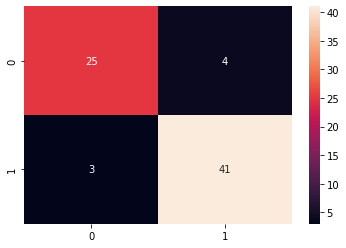

In [ ]:
sns.heatmap(cm, annot = True)

In [ ]:
from sklearn.svm import SVR
svm_reg = SVR ()
svm_reg.fit(X_train, y_train)
svm_pred = svm_reg.predict(X_test)
accuracy_SVR = svm_reg.score(X_test, y_test)
print("SVM Reg accuracy ",accuracy_SVR)

SVM Reg accuracy  0.28192690312436686


In [ ]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters = 2, random_state=1)
# kmeans.fit(X_train, y_train)
from sklearn.metrics import accuracy_score
kmeans_pred = kmeans.fit_predict(X_test)
kmeans_accuracy =accuracy_score(y_test, kmeans_pred)
print("Hierarchical clustering accuracy", kmeans_accuracy)


Hierarchical clustering accuracy 0.3287671232876712


In [ ]:
# from fcmeans import FCM
# fcm = FCM(n_clusters = 2)
# fcm.fit(X_train, y_test)
# cmeans_accuracy = cmeans.score(X_test, y_test)
# print("CMeans accuracy", cmeans_accuracy)

ModuleNotFoundError: ignored

In [ ]:
import scipy.cluster.hierarchy as shc
from sklearn.cluster import AgglomerativeClustering
h_cluster = AgglomerativeClustering(n_clusters = 2)
h_cluster.fit(X_train, y_train)

In [ ]:
from sklearn.metrics import accuracy_score
h_cluster_pred = h_cluster.fit_predict(X_test)
h_cluster_accuracy =accuracy_score(y_test, h_cluster_pred)
print("Hierarchical clustering accuracy", h_cluster_accuracy)

Hierarchical clustering accuracy 0.6027397260273972


In [ ]:
from sklearn.tree import DecisionTreeClassifier
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, y_train)

accuracy_dt = decision_tree.score(X_test, y_test)
print("Decision Tree accuracy is ", accuracy_dt)

Decision Tree accuracy is  0.7671232876712328


In [ ]:
import sklearn
from sklearn import tree

[Text(711.1467391304348, 1297.2272727272727, 'X[12] <= 2.5\ngini = 0.498\nsamples = 217\nvalue = [101, 116]'),
 Text(476.1195652173913, 1173.6818181818182, 'X[11] <= 0.5\ngini = 0.382\nsamples = 132\nvalue = [34, 98]'),
 Text(321.45652173913044, 1050.1363636363635, 'X[9] <= 2.55\ngini = 0.227\nsamples = 92\nvalue = [12, 80]'),
 Text(206.2173913043478, 926.590909090909, 'X[0] <= 57.5\ngini = 0.185\nsamples = 87\nvalue = [9, 78]'),
 Text(97.04347826086956, 803.0454545454545, 'X[12] <= 0.5\ngini = 0.065\nsamples = 59\nvalue = [2, 57]'),
 Text(48.52173913043478, 679.5, 'X[1] <= 0.5\ngini = 0.5\nsamples = 2\nvalue = [1, 1]'),
 Text(24.26086956521739, 555.9545454545455, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(72.78260869565217, 555.9545454545455, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(145.56521739130434, 679.5, 'X[3] <= 109.0\ngini = 0.034\nsamples = 57\nvalue = [1, 56]'),
 Text(121.30434782608695, 555.9545454545455, 'X[10] <= 1.5\ngini = 0.375\nsamples = 4\nvalue = [1, 

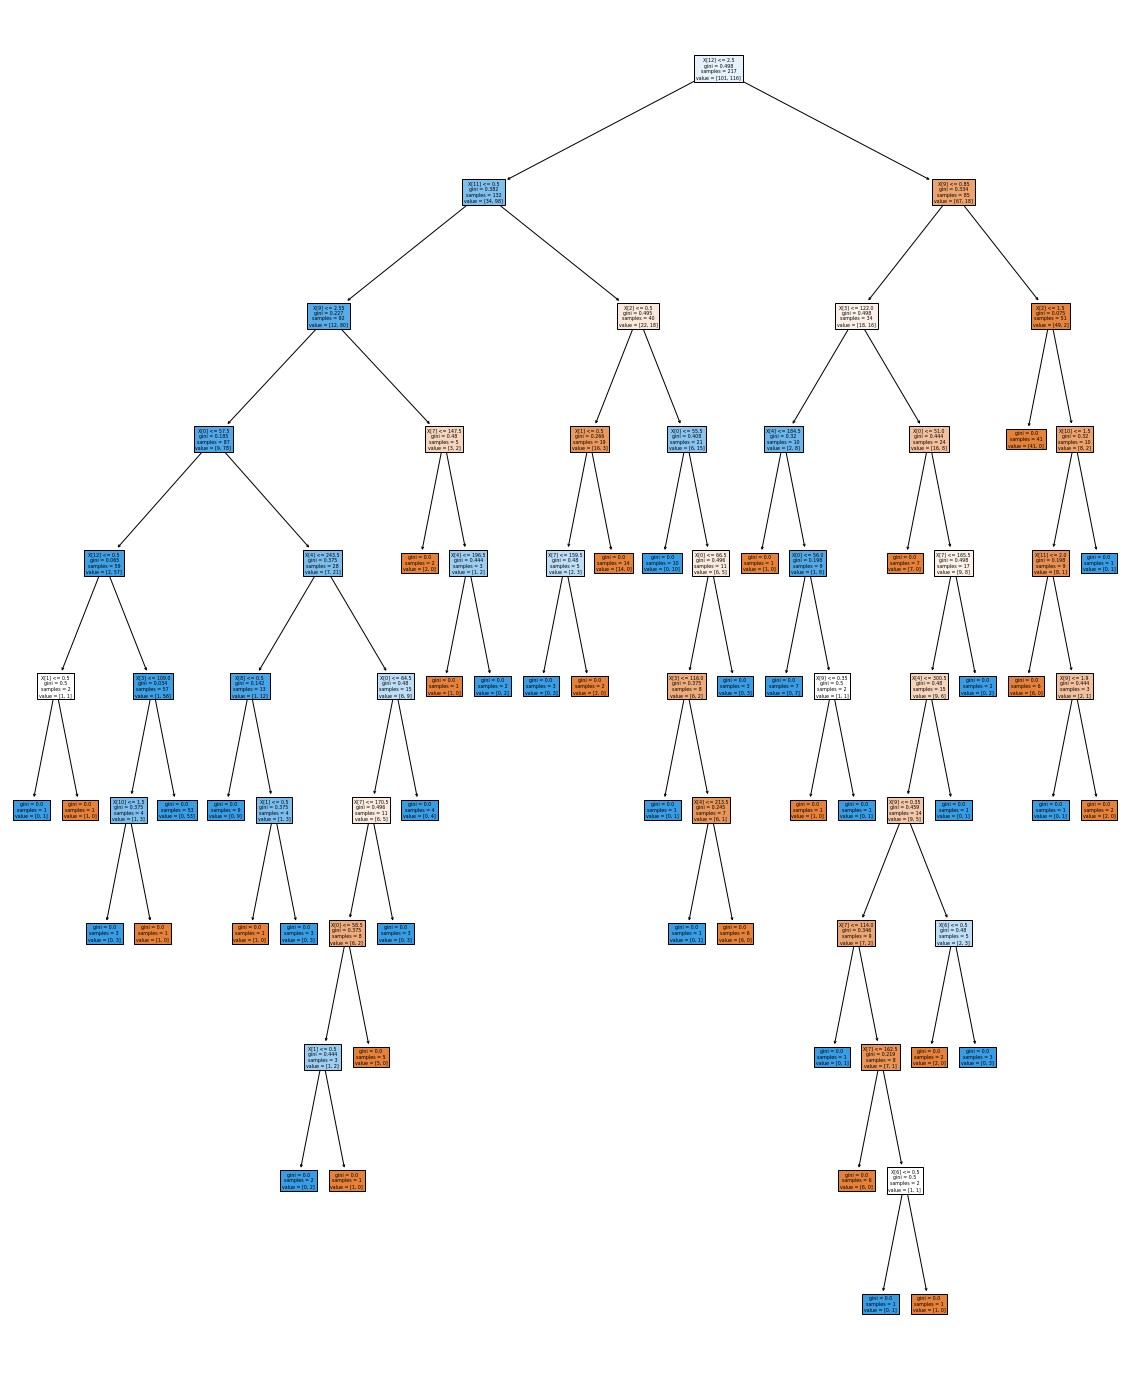

In [ ]:
figure = plt.figure(figsize =(20, 25))
# _ = tree.plot_tree(decision_tree, feature_names=data[columns], class_names=data.target, filled=True)
tree.plot_tree(decision_tree, filled=True)

In [ ]:
text_representation = tree.export_text(decision_tree, feature_names=columns)
print(text_representation)

|--- thal <= 2.50
|   |--- ca <= 0.50
|   |   |--- oldpeak <= 2.55
|   |   |   |--- age <= 57.50
|   |   |   |   |--- thal <= 0.50
|   |   |   |   |   |--- sex <= 0.50
|   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |--- sex >  0.50
|   |   |   |   |   |   |--- class: 0
|   |   |   |   |--- thal >  0.50
|   |   |   |   |   |--- trestbps <= 109.00
|   |   |   |   |   |   |--- slope <= 1.50
|   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |--- slope >  1.50
|   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |--- trestbps >  109.00
|   |   |   |   |   |   |--- class: 1
|   |   |   |--- age >  57.50
|   |   |   |   |--- chol <= 243.50
|   |   |   |   |   |--- exang <= 0.50
|   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |--- exang >  0.50
|   |   |   |   |   |   |--- sex <= 0.50
|   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |--- sex >  0.50
|   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |--- chol >  243.50
|   |

In [ ]:
from sklearn.ensemble import RandomForestClassifier
ranfor = RandomForestClassifier(n_estimators=100)
ranfor.fit(X_train, y_train)
acc_ranfor = ranfor.score(X_test, y_test)
print("Random Forest accuracy is ", acc_ranfor)

Random Forest accuracy is  0.8904109589041096


In [ ]:
from sklearn.ensemble import AdaBoostClassifier
adaboost = AdaBoostClassifier()
adaboost.fit(X_train, y_train)
adaboost_acc = adaboost.score(X_test, y_test)
print("Adaboost Accuracy is ", adaboost_acc)

Adaboost Accuracy is  0.7671232876712328


In [ ]:
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [ ]:
from sklearn.compose import ColumnTransformer
mm = MinMaxScaler()
minmax = ColumnTransformer([
          ("MinMaxScaler", mm, ['trestbps', 'chol', 'thalach'])], remainder= "passthrough")


In [ ]:
minmax.fit(data)

ColumnTransformer(remainder='passthrough',
                  transformers=[('MinMaxScaler', MinMaxScaler(),
                                 ['trestbps', 'chol', 'thalach'])])

In [ ]:
data_trans = minmax.transform(data)

In [ ]:
pd.DataFrame(data_trans).head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,0.6375,0.457265,0.543860,63.0,1.0,3.0,1.0,0.0,0.0,2.3,0.0,0.0,1.0,1.0
1,0.4500,0.529915,0.868421,37.0,1.0,2.0,0.0,1.0,0.0,3.5,0.0,0.0,2.0,1.0
2,0.4500,0.333333,0.736842,41.0,0.0,1.0,0.0,0.0,0.0,1.4,2.0,0.0,2.0,1.0
3,0.3250,0.470085,0.789474,56.0,1.0,1.0,0.0,1.0,0.0,0.8,2.0,0.0,2.0,1.0
4,0.3250,0.974359,0.657895,57.0,0.0,0.0,0.0,1.0,1.0,0.6,2.0,0.0,2.0,1.0


In [ ]:
data_trans = pd.DataFrame(data_trans, columns=['trestbps', 'chol', 'thalach', 'age', 'sex', 'cp', 'fbs', 'restecg',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'])

In [ ]:
data_trans.head()


,trestbps,chol,thalach,age,sex,cp,fbs,restecg,exang,oldpeak,slope,ca,thal,target
0,0.6375,0.457265,0.543860,63.0,1.0,3.0,1.0,0.0,0.0,2.3,0.0,0.0,1.0,1.0
1,0.4500,0.529915,0.868421,37.0,1.0,2.0,0.0,1.0,0.0,3.5,0.0,0.0,2.0,1.0
2,0.4500,0.333333,0.736842,41.0,0.0,1.0,0.0,0.0,0.0,1.4,2.0,0.0,2.0,1.0
3,0.3250,0.470085,0.789474,56.0,1.0,1.0,0.0,1.0,0.0,0.8,2.0,0.0,2.0,1.0
4,0.3250,0.974359,0.657895,57.0,0.0,0.0,0.0,1.0,1.0,0.6,2.0,0.0,2.0,1.0


In [ ]:
data_trans.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 290 entries, 0 to 289
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   trestbps  290 non-null    float64
 1   chol      290 non-null    float64
 2   thalach   290 non-null    float64
 3   age       290 non-null    float64
 4   sex       290 non-null    float64
 5   cp        290 non-null    float64
 6   fbs       290 non-null    float64
 7   restecg   290 non-null    float64
 8   exang     290 non-null    float64
 9   oldpeak   290 non-null    float64
 10  slope     290 non-null    float64
 11  ca        290 non-null    float64
 12  thal      290 non-null    float64
 13  target    290 non-null    float64
dtypes: float64(14)
memory usage: 31.8 KB


In [ ]:
X = data_trans[columns]
y = data_trans['target']
X_train_t, X_test_t, y_train_t, y_test_t = train_test_split(X, y, test_size = 0.25, random_state=42)

In [ ]:
X_train_t



,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
68,62.0,0.0,0.0,0.3750,0.354701,0.0,1.0,0.657895,0.0,0.0,2.0,0.0,2.0
208,56.0,1.0,0.0,0.3875,0.525641,1.0,0.0,0.491228,1.0,1.2,1.0,1.0,2.0
37,65.0,0.0,2.0,0.7625,0.611111,0.0,1.0,0.526316,0.0,0.8,2.0,0.0,2.0
16,58.0,0.0,2.0,0.3250,0.914530,0.0,1.0,0.736842,0.0,0.0,2.0,0.0,2.0
287,68.0,1.0,0.0,0.6250,0.286325,1.0,1.0,0.464912,0.0,3.4,1.0,2.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
188,60.0,1.0,0.0,0.6375,0.666667,0.0,0.0,0.473684,1.0,2.8,1.0,2.0,3.0
71,29.0,1.0,1.0,0.4500,0.333333,0.0,0.0,1.000000,0.0,0.0,2.0,0.0,2.0
106,57.0,1.0,2.0,0.7000,0.000000,1.0,1.0,0.745614,0.0,0.2,2.0,1.0,3.0
270,40.0,1.0,0.0,0.7250,0.414530,0.0,1.0,0.815789,0.0,0.0,2.0,0.0,3.0


In [ ]:
logreg = LogisticRegression()
logreg.fit(X_train_t, y_train_t)
predictions = logreg.predict(X_test_t)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


In [ ]:
logreg.score(X_test_t, y_test_t)

0.9041095890410958

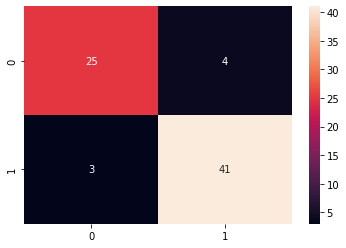

In [ ]:
cm = confusion_matrix(y_test_t, predictions)
sns.heatmap(cm, annot = True)